In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_df():
    a = np.random.normal(0, 0.5, 100)
    b = np.random.normal(1, 0.3, 100)
    dfs = []
    df = pd.DataFrame(columns=['feature', 'target'])
    df['feature'] = a
    df['target'] = 'A'
    dfs.append(df.copy())
    df = pd.DataFrame(columns=['feature', 'target'])
    df['feature'] = b
    df['target'] = 'B'
    dfs.append(df.copy())
    df = pd.concat(dfs)
    df['target'] = df['target']
    return df.reset_index().drop('index', axis=1)
df = get_df()

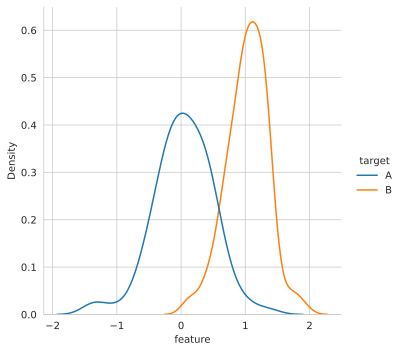

In [4]:
sns.displot(df, x='feature', hue='target', kind="kde")
plt.show()

In [5]:
from Trees.Tree import H, Q, get_grid, split_by_feature, find_class

In [6]:
Q(df, feature='feature', target='target', threshold=0)

0.2580244610443865

find threshold in: -1.3660017053295586 1.8299808353102882


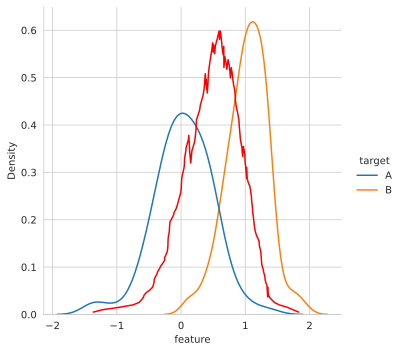

In [7]:
def split_plot(df, feature, target, coef: float = 1):
    curves = {
        'H(R_left)': [],
        'H(R_right)': [],
        'Q(threshold)': [],
        'thresholds': []
    }

    for threshold in get_grid(df[feature]):
        curves['H(R_left)'].append(H(df[df[feature] <= threshold][target]))
        curves['H(R_right)'].append(H(df[df[feature] > threshold][target]))
        curves['Q(threshold)'].append(coef*Q(df, feature, target, threshold=threshold))
        curves['thresholds'].append(threshold)

    sns.displot(df, x=feature, hue=target, kind="kde")
    # sns.lineplot(x=curves['thresholds'], y=curves['H(R_left)'])
    # sns.lineplot(x=curves['thresholds'], y=curves['H(R_right)'])
    sns.lineplot(x=curves['thresholds'], y=curves['Q(threshold)'], color='red')
    plt.show()

split_plot(df, 'feature', 'target')

In [8]:
split_by_feature(df, feature='feature', target='target')

find threshold in: -1.3660017053295586 1.8299808353102882


{'threshold': 0.5925176694459007, 'feature': 'feature'}

In [9]:
find_class(df, feature='feature', target='target', threshold=0.351267314756887)

{'left': 'A', 'right': 'B'}

### Real dataset testing

In [10]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['flipper_length_mm'] != np.nan]

find threshold in: 13.149999999999999 nan


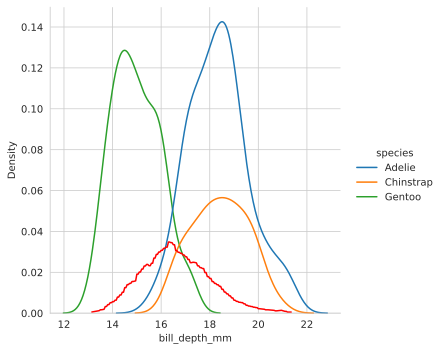

In [11]:
split_plot(dataset, 'bill_depth_mm', 'species', coef=0.05)

In [12]:
split_by_feature(dataset, 'bill_depth_mm', 'species')

find threshold in: 13.149999999999999 nan


{'threshold': 16.3, 'feature': 'bill_depth_mm'}

In [13]:
find_class(dataset, feature='bill_depth_mm', target='species', threshold=16.3)

{'left': 'Gentoo', 'right': 'Adelie'}

### Another dataset

In [14]:
from sklearn import datasets
blobs = datasets.make_blobs(n_samples=1000, random_state=42, centers=5)
df_train = pd.DataFrame(blobs[0], columns=['x1', 'x2'])
df_train['target'] = blobs[1]

find threshold in: -11.327408454223459 7.46599914208065


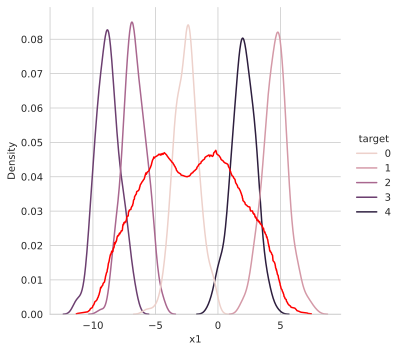

In [15]:
split_plot(df_train, 'x1', 'target', coef=0.05)

In [16]:
split_by_feature(df_train, 'x1', 'target')

find threshold in: -11.327408454223459 7.46599914208065


{'threshold': -0.17245418376455102, 'feature': 'x1'}

In [17]:
find_class(df_train, feature='x1', target='target', threshold=-0.17245418376455102)

{'left': 0, 'right': 1}